In [55]:
# Importing the packages

import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns


In [2]:
final_data = pd.read_csv("/home/madhav/Desktop/MADHAV/finaldata.csv")
final_data.shape

(2188, 21)

In [3]:
## Checking the NA
data=final_data.dropna()
data.shape # Hence , there is no NA values.

(2188, 21)

In [4]:
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [5]:
data.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
3,IA,168,408,363-1107,no,no,0,128.8,96,21.90,...,71,8.92,141.1,128,6.35,11.2,2,3.02,1,False
4,MT,95,510,394-8006,no,no,0,156.6,88,26.62,...,75,21.05,192.3,115,8.65,12.3,5,3.32,3,False


In [6]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [7]:
len(data.columns)

21

In [8]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000
mean,100.466636,437.345978,8.173675,179.535695,100.595064,30.521563,200.689625,100.118373,17.058821,200.135512,100.376143,9.006133,10.312523,4.548903,2.784899,1.687843
std,39.520159,42.513760,13.713910,52.280929,19.285182,8.887697,48.585649,19.057230,4.129858,48.374990,18.931415,2.176978,2.530404,2.479525,0.683209,0.759574
min,1.000000,408.000000,0.000000,37.700000,49.000000,6.410000,67.000000,51.000000,5.700000,67.700000,48.000000,3.050000,4.000000,1.000000,1.080000,1.000000
25%,73.000000,408.000000,0.000000,143.375000,87.750000,24.375000,167.275000,87.000000,14.217500,167.000000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.500000,415.000000,0.000000,179.300000,101.000000,30.480000,201.050000,100.000000,17.090000,199.050000,101.000000,8.960000,10.300000,4.000000,2.780000,2.000000
75%,127.000000,510.000000,20.250000,215.175000,114.000000,36.582500,233.725000,113.000000,19.862500,233.700000,113.000000,10.520000,12.100000,6.000000,3.270000,2.000000
max,205.000000,510.000000,51.000000,322.500000,152.000000,54.830000,336.000000,154.000000,28.560000,329.200000,152.000000,14.810000,17.300000,20.000000,4.670000,3.000000


In [9]:
data['state'].unique() 

array(['KS', 'OH', 'OK', 'IA', 'MT', 'ID', 'VT', 'VA', 'TX', 'SC', 'NE',
       'HI', 'IL', 'NH', 'AZ', 'GA', 'MA', 'AK', 'NJ', 'AR', 'OR', 'MI',
       'DE', 'WY', 'IN', 'UT', 'CO', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM',
       'NV', 'MD', 'WV', 'KY', 'DC', 'ME', 'MS', 'MO', 'AL', 'FL', 'LA',
       'RI', 'NY', 'PA', 'TN', 'WI', 'ND', 'CT'], dtype=object)

In [10]:
data['area code'].unique() 

array([415, 408, 510])

In [11]:
data['international plan'].unique() 

array(['no', 'yes'], dtype=object)

In [12]:
data['voice mail plan'].unique() 

array(['yes', 'no'], dtype=object)

In [13]:
data['number vmail messages'].unique() 

array([25, 26,  0, 27, 33, 37, 28, 24, 30, 34, 41, 35, 29, 21, 32, 36, 23,
       43, 31, 38, 22, 40, 48, 18, 39, 45, 16, 20, 17, 14, 42, 19, 51, 15,
       11, 47, 44, 12,  4, 13,  8, 50,  9])

In [14]:
data['total day calls'].unique() 

array([110, 123, 113,  96,  88, 139, 114,  66,  90, 103,  76,  73, 117,
        95, 105, 118,  80,  64, 106,  94, 102,  82,  77,  97, 120, 133,
       135, 108,  57, 112,  67,  98, 129,  83,  91,  92,  74,  70,  93,
       146,  72,  99, 104, 101, 125,  61, 100,  71, 131, 124, 119,  52,
       115, 109, 107,  86,  87, 121, 116, 151, 126, 111,  68, 145,  85,
        78, 140,  81, 122,  79,  55,  89, 134,  63,  53,  84,  65, 141,
       128, 132,  69, 137,  75, 138, 144, 143, 130, 150,  54, 127, 147,
        56,  58,  51, 148,  60,  62, 136, 152,  49, 142,  59])

In [15]:
data['total intl calls'].unique()

array([ 3,  2,  5,  4,  6,  1,  9,  8,  7, 10, 11, 12, 13, 18, 15, 14, 20,
       17])

In [16]:
data['total intl calls'].unique()

array([ 3,  2,  5,  4,  6,  1,  9,  8,  7, 10, 11, 12, 13, 18, 15, 14, 20,
       17])

In [17]:
data['customer service calls'].unique()

array([1, 3, 2])

In [18]:
# Making Dummy Variables for boolean variables 

data['international plan'] = np.where(data['international plan']=='Yes', 1,0)
data['voice mail plan'] = np.where(data['voice mail plan']=='Yes', 1,0)
data['churn'] = np.where(data['churn']==True, 1,0)

In [19]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [20]:
# Making dummy variable for categorical variables

data = pd.get_dummies(data,columns=['area code','customer service calls'])


In [21]:
data.columns

Index(['state', 'account length', 'phone number', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'churn', 'area code_408',
       'area code_415', 'area code_510', 'customer service calls_1',
       'customer service calls_2', 'customer service calls_3'],
      dtype='object')

In [22]:
data= data.drop(['state','phone number'], axis=1)

data.head(5)


,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total intl minutes,total intl calls,total intl charge,churn,area code_408,area code_415,area code_510,customer service calls_1,customer service calls_2,customer service calls_3
0,128,0,0,25,265.1,110,45.07,197.4,99,16.78,...,10.0,3,2.70,0,0,1,0,1,0,0
1,107,0,0,26,161.6,123,27.47,195.5,103,16.62,...,13.7,3,3.70,0,0,1,0,1,0,0
2,75,0,0,0,166.7,113,28.34,148.3,122,12.61,...,10.1,3,2.73,0,0,1,0,0,0,1
3,168,0,0,0,128.8,96,21.90,104.9,71,8.92,...,11.2,2,3.02,0,1,0,0,1,0,0
4,95,0,0,0,156.6,88,26.62,247.6,75,21.05,...,12.3,5,3.32,0,0,0,1,0,0,1


In [23]:
data.columns

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'churn', 'area code_408', 'area code_415',
       'area code_510', 'customer service calls_1', 'customer service calls_2',
       'customer service calls_3'],
      dtype='object')

In [24]:
## Making the column name in upper case
data.columns=map(str.upper,data.columns)
data.columns

Index(['ACCOUNT LENGTH', 'INTERNATIONAL PLAN', 'VOICE MAIL PLAN',
       'NUMBER VMAIL MESSAGES', 'TOTAL DAY MINUTES', 'TOTAL DAY CALLS',
       'TOTAL DAY CHARGE', 'TOTAL EVE MINUTES', 'TOTAL EVE CALLS',
       'TOTAL EVE CHARGE', 'TOTAL NIGHT MINUTES', 'TOTAL NIGHT CALLS',
       'TOTAL NIGHT CHARGE', 'TOTAL INTL MINUTES', 'TOTAL INTL CALLS',
       'TOTAL INTL CHARGE', 'CHURN', 'AREA CODE_408', 'AREA CODE_415',
       'AREA CODE_510', 'CUSTOMER SERVICE CALLS_1', 'CUSTOMER SERVICE CALLS_2',
       'CUSTOMER SERVICE CALLS_3'],
      dtype='object')

In [25]:
## Subset variables
final_data=data[['ACCOUNT LENGTH','NUMBER VMAIL MESSAGES','TOTAL DAY MINUTES', 'TOTAL DAY CALLS',
        'TOTAL EVE MINUTES', 'TOTAL EVE CALLS',
        'TOTAL NIGHT MINUTES', 'TOTAL NIGHT CALLS',
        'TOTAL INTL MINUTES', 'TOTAL INTL CALLS']]

In [26]:

from sklearn import preprocessing
clustervar = final_data.copy()
clustervar['ACCOUNT LENGTH']=preprocessing.scale(clustervar['ACCOUNT LENGTH'].astype('float64'))
clustervar['NUMBER VMAIL MESSAGES']=preprocessing.scale(clustervar['NUMBER VMAIL MESSAGES'].astype('float64'))
clustervar['TOTAL DAY MINUTES']=preprocessing.scale(clustervar['TOTAL DAY MINUTES'].astype('float64'))
clustervar['TOTAL DAY CALLS']=preprocessing.scale(clustervar['TOTAL DAY CALLS'].astype('float64'))
#clustervar['TOTAL DAY CHARGE']=preprocessing.scale(clustervar['TOTAL DAY CHARGE'].astype('float64'))
clustervar['TOTAL EVE MINUTES']=preprocessing.scale(clustervar['TOTAL EVE MINUTES'].astype('float64'))
clustervar['TOTAL EVE CALLS']=preprocessing.scale(clustervar['TOTAL EVE CALLS'].astype('float64'))
#clustervar['TOTAL EVE CHARGE']=preprocessing.scale(clustervar['TOTAL EVE CHARGE'].astype('float64'))
clustervar['TOTAL NIGHT MINUTES']=preprocessing.scale(clustervar['TOTAL NIGHT MINUTES'].astype('float64'))
clustervar['TOTAL NIGHT CALLS']=preprocessing.scale(clustervar['TOTAL NIGHT CALLS'].astype('float64'))
#clustervar['TOTAL NIGHT CHARGE']=preprocessing.scale(clustervar['TOTAL NIGHT CHARGE'].astype('float64'))
clustervar['TOTAL INTL MINUTES']=preprocessing.scale(clustervar['TOTAL INTL MINUTES'].astype('float64'))
clustervar['TOTAL INTL CALLS']=preprocessing.scale(clustervar['TOTAL INTL CALLS'].astype('float64'))
#clustervar['TOTAL INTL CHARGE']=preprocessing.scale(clustervar['TOTAL INTL CHARGE'].astype('float64'))


In [27]:
clustervar.head(5)


,ACCOUNT LENGTH,NUMBER VMAIL MESSAGES,TOTAL DAY MINUTES,TOTAL DAY CALLS,TOTAL EVE MINUTES,TOTAL EVE CALLS,TOTAL NIGHT MINUTES,TOTAL NIGHT CALLS,TOTAL INTL MINUTES,TOTAL INTL CALLS
0,0.696851,1.227234,1.637000,0.487788,-0.067723,-0.058698,0.921441,-0.495382,-0.123535,-0.624820
1,0.165355,1.300169,-0.343142,1.162035,-0.106838,0.151244,1.122003,0.138630,1.339016,-0.624820
2,-0.644543,-0.596150,-0.245570,0.643384,-1.078541,1.148469,-0.273665,1.089648,-0.084007,-0.624820
3,1.709224,-0.596150,-0.970665,-0.238324,-1.972013,-1.528293,-1.220652,1.459488,0.350806,-1.028216
4,-0.138357,-0.596150,-0.438801,-0.653245,0.965740,-1.318351,-0.162011,0.772642,0.785618,0.181970


In [28]:
strdata = pd.DataFrame(clustervar)

In [29]:
strdata.head(5)

,ACCOUNT LENGTH,NUMBER VMAIL MESSAGES,TOTAL DAY MINUTES,TOTAL DAY CALLS,TOTAL EVE MINUTES,TOTAL EVE CALLS,TOTAL NIGHT MINUTES,TOTAL NIGHT CALLS,TOTAL INTL MINUTES,TOTAL INTL CALLS
0,0.696851,1.227234,1.637000,0.487788,-0.067723,-0.058698,0.921441,-0.495382,-0.123535,-0.624820
1,0.165355,1.300169,-0.343142,1.162035,-0.106838,0.151244,1.122003,0.138630,1.339016,-0.624820
2,-0.644543,-0.596150,-0.245570,0.643384,-1.078541,1.148469,-0.273665,1.089648,-0.084007,-0.624820
3,1.709224,-0.596150,-0.970665,-0.238324,-1.972013,-1.528293,-1.220652,1.459488,0.350806,-1.028216
4,-0.138357,-0.596150,-0.438801,-0.653245,0.965740,-1.318351,-0.162011,0.772642,0.785618,0.181970


In [30]:
#Concatenatinating the dataset 
final_data = pd.concat([strdata,data['INTERNATIONAL PLAN'],data['VOICE MAIL PLAN'],
       data['CHURN'], data['AREA CODE_408'], data['AREA CODE_415'],
       data['AREA CODE_510'], data['CUSTOMER SERVICE CALLS_1'], data['CUSTOMER SERVICE CALLS_2'],
       data['CUSTOMER SERVICE CALLS_3']], axis=1)

In [31]:
final_data.head(5)

,ACCOUNT LENGTH,NUMBER VMAIL MESSAGES,TOTAL DAY MINUTES,TOTAL DAY CALLS,TOTAL EVE MINUTES,TOTAL EVE CALLS,TOTAL NIGHT MINUTES,TOTAL NIGHT CALLS,TOTAL INTL MINUTES,TOTAL INTL CALLS,INTERNATIONAL PLAN,VOICE MAIL PLAN,CHURN,AREA CODE_408,AREA CODE_415,AREA CODE_510,CUSTOMER SERVICE CALLS_1,CUSTOMER SERVICE CALLS_2,CUSTOMER SERVICE CALLS_3
0,0.696851,1.227234,1.637000,0.487788,-0.067723,-0.058698,0.921441,-0.495382,-0.123535,-0.624820,0,0,0,0,1,0,1,0,0
1,0.165355,1.300169,-0.343142,1.162035,-0.106838,0.151244,1.122003,0.138630,1.339016,-0.624820,0,0,0,0,1,0,1,0,0
2,-0.644543,-0.596150,-0.245570,0.643384,-1.078541,1.148469,-0.273665,1.089648,-0.084007,-0.624820,0,0,0,0,1,0,0,0,1
3,1.709224,-0.596150,-0.970665,-0.238324,-1.972013,-1.528293,-1.220652,1.459488,0.350806,-1.028216,0,0,0,1,0,0,1,0,0
4,-0.138357,-0.596150,-0.438801,-0.653245,0.965740,-1.318351,-0.162011,0.772642,0.785618,0.181970,0,0,0,0,0,1,0,0,1


In [32]:
final_data.columns


Index(['ACCOUNT LENGTH', 'NUMBER VMAIL MESSAGES', 'TOTAL DAY MINUTES',
       'TOTAL DAY CALLS', 'TOTAL EVE MINUTES', 'TOTAL EVE CALLS',
       'TOTAL NIGHT MINUTES', 'TOTAL NIGHT CALLS', 'TOTAL INTL MINUTES',
       'TOTAL INTL CALLS', 'INTERNATIONAL PLAN', 'VOICE MAIL PLAN', 'CHURN',
       'AREA CODE_408', 'AREA CODE_415', 'AREA CODE_510',
       'CUSTOMER SERVICE CALLS_1', 'CUSTOMER SERVICE CALLS_2',
       'CUSTOMER SERVICE CALLS_3'],
      dtype='object')

In [33]:
 #Applying the logistic regression 

X = final_data.drop('CHURN',axis=1)
y = final_data['CHURN']

In [34]:
## Splitting the test train dataset
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,stratify=y)

In [35]:
#sm = SMOTE(random_state=12, ratio = 1.0)(class_weight='balanced')
#X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
model=logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

AttributeError: 'LogisticRegression' object has no attribute 'summary'

In [37]:
y_pred=y_pred.tolist()

In [38]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[586   3]
 [ 54  14]]


In [40]:
print(X.corr())

                          ACCOUNT LENGTH  NUMBER VMAIL MESSAGES  \
ACCOUNT LENGTH                  1.000000              -0.007768   
NUMBER VMAIL MESSAGES          -0.007768               1.000000   
TOTAL DAY MINUTES               0.020925               0.022712   
TOTAL DAY CALLS                 0.057037              -0.012512   
TOTAL EVE MINUTES              -0.015626              -0.002165   
TOTAL EVE CALLS                 0.026143              -0.001743   
TOTAL NIGHT MINUTES             0.002170               0.000069   
TOTAL NIGHT CALLS              -0.017790               0.004380   
TOTAL INTL MINUTES              0.022907               0.004109   
TOTAL INTL CALLS                0.015667               0.001727   
INTERNATIONAL PLAN                   NaN                    NaN   
VOICE MAIL PLAN                      NaN                    NaN   
AREA CODE_408                   0.019715              -0.005301   
AREA CODE_415                  -0.005294               0.02013

In [41]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [42]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(X, 31))


Top Absolute Correlations
CUSTOMER SERVICE CALLS_1  CUSTOMER SERVICE CALLS_2    0.685794
AREA CODE_408             AREA CODE_415               0.574984
AREA CODE_415             AREA CODE_510               0.571538
CUSTOMER SERVICE CALLS_1  CUSTOMER SERVICE CALLS_3    0.463686
AREA CODE_408             AREA CODE_510               0.342740
CUSTOMER SERVICE CALLS_2  CUSTOMER SERVICE CALLS_3    0.326834
AREA CODE_408             CUSTOMER SERVICE CALLS_3    0.061262
ACCOUNT LENGTH            TOTAL DAY CALLS             0.057037
TOTAL DAY CALLS           CUSTOMER SERVICE CALLS_1    0.055802
AREA CODE_510             CUSTOMER SERVICE CALLS_3    0.055545
TOTAL DAY MINUTES         AREA CODE_408               0.047511
AREA CODE_408             CUSTOMER SERVICE CALLS_1    0.044690
AREA CODE_510             CUSTOMER SERVICE CALLS_1    0.044491
NUMBER VMAIL MESSAGES     CUSTOMER SERVICE CALLS_3    0.043877
TOTAL INTL CALLS          AREA CODE_415               0.043197
                          ARE

In [43]:
#Top Absolute Correlations
#TOTAL DAY MINUTES         TOTAL DAY CHARGE            1.000000
#TOTAL EVE MINUTES         TOTAL EVE CHARGE            1.000000
#TOTAL NIGHT MINUTES       TOTAL NIGHT CHARGE          0.999999
#TOTAL INTL MINUTES        TOTAL INTL CHARGE           0.999991
#CUSTOMER SERVICE CALLS_1  CUSTOMER SERVICE CALLS_2    0.685794
#AREA CODE_408             AREA CODE_415               0.574984
#AREA CODE_415             AREA CODE_510               0.571538
#CUSTOMER SERVICE CALLS_1  CUSTOMER SERVICE CALLS_3    0.463686
#AREA CODE_408             AREA CODE_510               0.342740
#CUSTOMER SERVICE CALLS_2  CUSTOMER SERVICE CALLS_3    0.326834
#AREA CODE_408             CUSTOMER SERVICE CALLS_3    0.061262
#ACCOUNT LENGTH            TOTAL DAY CALLS             0.057037
#TOTAL DAY CALLS           CUSTOMER SERVICE CALLS_1    0.055802
#AREA CODE_510             CUSTOMER SERVICE CALLS_3    0.055545
#TOTAL DAY CHARGE          AREA CODE_408               0.047512
#TOTAL DAY MINUTES         AREA CODE_408               0.047511
#AREA CODE_408             CUSTOMER SERVICE CALLS_1    0.044690
#AREA CODE_510             CUSTOMER SERVICE CALLS_1    0.044491
#NUMBER VMAIL MESSAGES     CUSTOMER SERVICE CALLS_3    0.043877
#TOTAL INTL CALLS          AREA CODE_415               0.043197
#                          AREA CODE_510               0.042429
#TOTAL DAY CALLS           TOTAL NIGHT MINUTES         0.038660
#                          TOTAL NIGHT CHARGE          0.038621
#TOTAL DAY CHARGE          AREA CODE_415               0.037594
#TOTAL DAY MINUTES         AREA CODE_415               0.037589
#TOTAL INTL MINUTES        AREA CODE_415               0.037364
#TOTAL INTL CHARGE         AREA CODE_415               0.037348
#ACCOUNT LENGTH            CUSTOMER SERVICE CALLS_2    0.035507
#TOTAL DAY CALLS           CUSTOMER SERVICE CALLS_2    0.033292
#TOTAL NIGHT CALLS         CUSTOMER SERVICE CALLS_3    0.032172
#TOTAL DAY CALLS           CUSTOMER SERVICE CALLS_3    0.031932
#dtype: float64

In [44]:
from sklearn.svm import SVC 

clf = SVC(kernel='linear', C= 1)
clf.fit(X, y)
prediction = clf.predict(X_test)


from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test , y_pred ))
print('Recall:', recall_score(y_test,  y_pred))
print('Precision:', precision_score(y_test,  y_pred))
print('\n clasification report:\n', classification_report(y_test, y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test,  y_pred))


Accuracy: 0.91324200913242
F1 score: 0.32941176470588235
Recall: 0.20588235294117646
Precision: 0.8235294117647058

 clasification report:
              precision    recall  f1-score   support

          0       0.92      0.99      0.95       589
          1       0.82      0.21      0.33        68

avg / total       0.91      0.91      0.89       657


 confussion matrix:
 [[586   3]
 [ 54  14]]


In [45]:
#clf_rf.fit(x_train_res, y_train_res)
#print 'Validation Results'
#print clf_rf.score(x_val, y_val)
#print recall_score(y_val, clf_rf.predict(x_val))
#print '\nTest Results'
#print clf_rf.score(test_features, test_target)
#print recall_score(test_target, clf_rf.predict(test_features))

In [46]:
len(y_pred) - sum(y_pred) ## No of 0 in y predicted 

640

In [47]:
 sum(y_pred)

17

In [48]:
final_data['CHURN'].value_counts()/np.sum(final_data['CHURN'].value_counts().values)*100 # Raw Data

# This is the case of class imbalance .

0    89.670932
1    10.329068
Name: CHURN, dtype: float64

In [49]:
!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y_test, y_pred)
plt.show()

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


/home/madhav/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


IndexError: too many indices for array

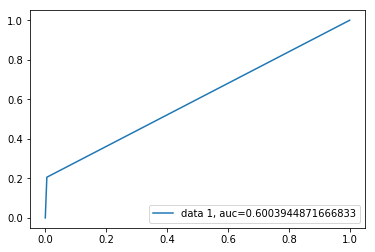

In [50]:
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [51]:
 skplt.metrics.plot_precision_recall_curve(y_test,y_pred)

/home/madhav/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


IndexError: too many indices for array

In [54]:
model.predict_probab(X_test)y

SyntaxError: invalid syntax (<ipython-input-54-fa3cc411d854>, line 1)